In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

In [4]:
df = pd.read_excel("OnlineRetail.xlsx")
display(df)
df.describe()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [5]:
df.Country.value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [7]:
# missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
#removing null values
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
df['Items_bought'] = df['UnitPrice']*df['Quantity']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Transaction']=(df['InvoiceDate'].max()-df['InvoiceDate']).dt.days

display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Items_bought,Transaction,Frequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373,2.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,182.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373,31.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,73.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373,17.0
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0,NaN


In [12]:
frequency_of_customers = df.groupby('CustomerID')['InvoiceNo'].count()
freq = frequency_of_customers.reset_index()
freq.columns = ['CustomerID', 'Frequency']
df['Frequency'] = freq['Frequency']

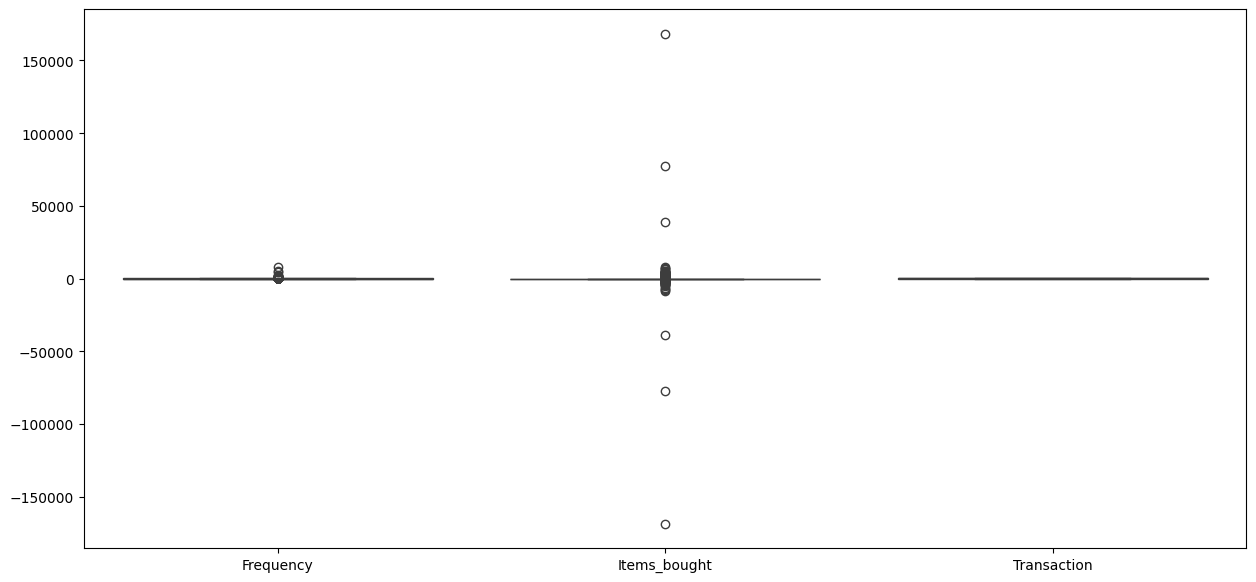

In [13]:
numerical_columns = ['Frequency','Items_bought','Transaction']
plt.figure(figsize=(15,7))
sns.boxplot(data = df[numerical_columns])
plt.show()

In [41]:
def outlier_removal(column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3-Q1
  high = df[column] >= Q1 - 1.5*IQR
  low = df[column] >= Q1 +1.5*IQR
  outlier = df[(df[column] >= Q1 - 1.5*IQR) & (df[column] <= Q3 + 1.5*IQR)]
  return outlier,high,low

In [52]:
data = pd.DataFrame(numerical_columns)

for column in numerical_columns:
    print('Data shape before removing outliers:', df[column].shape)
    cleaned_data, high_outliers, low_outliers = outlier_removal(column)
    data[column] = cleaned_data.shape[0]
    print('Data shape after removing outliers:', cleaned_data.shape)
    total_outliers = len(high_outliers) + len(low_outliers)
    print('Total number of outliers removed:', total_outliers)

Data shape before removing outliers: (406829,)
Data shape after removing outliers: (2899, 11)
Total number of outliers removed: 813658
Data shape before removing outliers: (406829,)
Data shape after removing outliers: (373649, 11)
Total number of outliers removed: 813658
Data shape before removing outliers: (406829,)
Data shape after removing outliers: (406829, 11)
Total number of outliers removed: 813658


In [51]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
x2_df = df[['Frequency', 'Items_bought', 'Transaction']]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(x2_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns=['Frequcency','Items_bought','Transaction']
scaled_df['Country']=df['Country']
scaled_df.dropna(inplace=True)
data_set_scaled = scaled_df.drop('Country',axis=1)
datasetscale = data_set_scaled.copy()

# K- means

In [30]:
kmeans = KMeans(n_clusters=4, max_iter=50)
y_predicted = kmeans.fit_predict(data_set_scaled)
data_set_scaled['clusters']= y_predicted

print(kmeans.cluster_centers_)

[[ 6.16813215e-03  5.00063137e-01  9.98579797e-01 -4.71844785e-15]
 [ 4.16896922e-02  5.00060368e-01  9.98518736e-01  2.00000000e+00]
 [ 1.64886620e-01  5.00046752e-01  9.97989276e-01  3.00000000e+00]
 [ 6.11876723e-01  5.00056538e-01  9.98659517e-01  1.00000000e+00]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


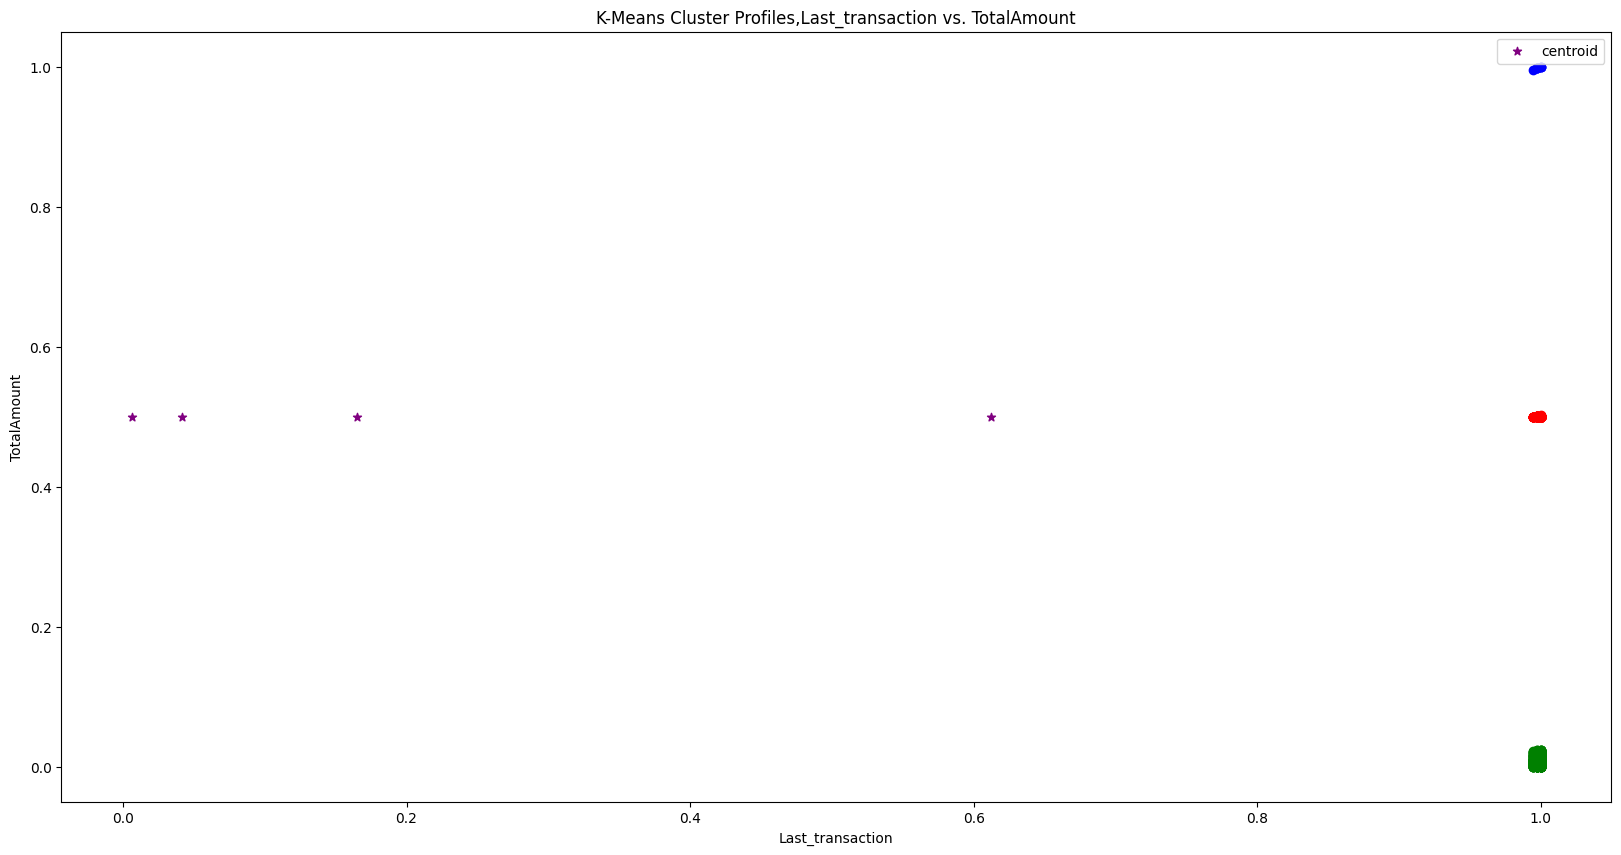

In [31]:
data_set_scaled['clusters']= y_predicted
# 'frequcency','Items_bought','Transaction'
df1 = data_set_scaled[data_set_scaled.clusters==0]
df2 = data_set_scaled[data_set_scaled.clusters==1]
df3 = data_set_scaled[data_set_scaled.clusters==2]
plt.figure(figsize=(20,10))
plt.scatter(df1.Transaction,df1['Frequcency'],color='green')
plt.scatter(df2.Transaction,df2['Items_bought'],color='red')
plt.scatter(df3.Transaction,df3['Transaction'],color='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmount')
plt.title('K-Means Cluster Profiles,Last_transaction vs. TotalAmount')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


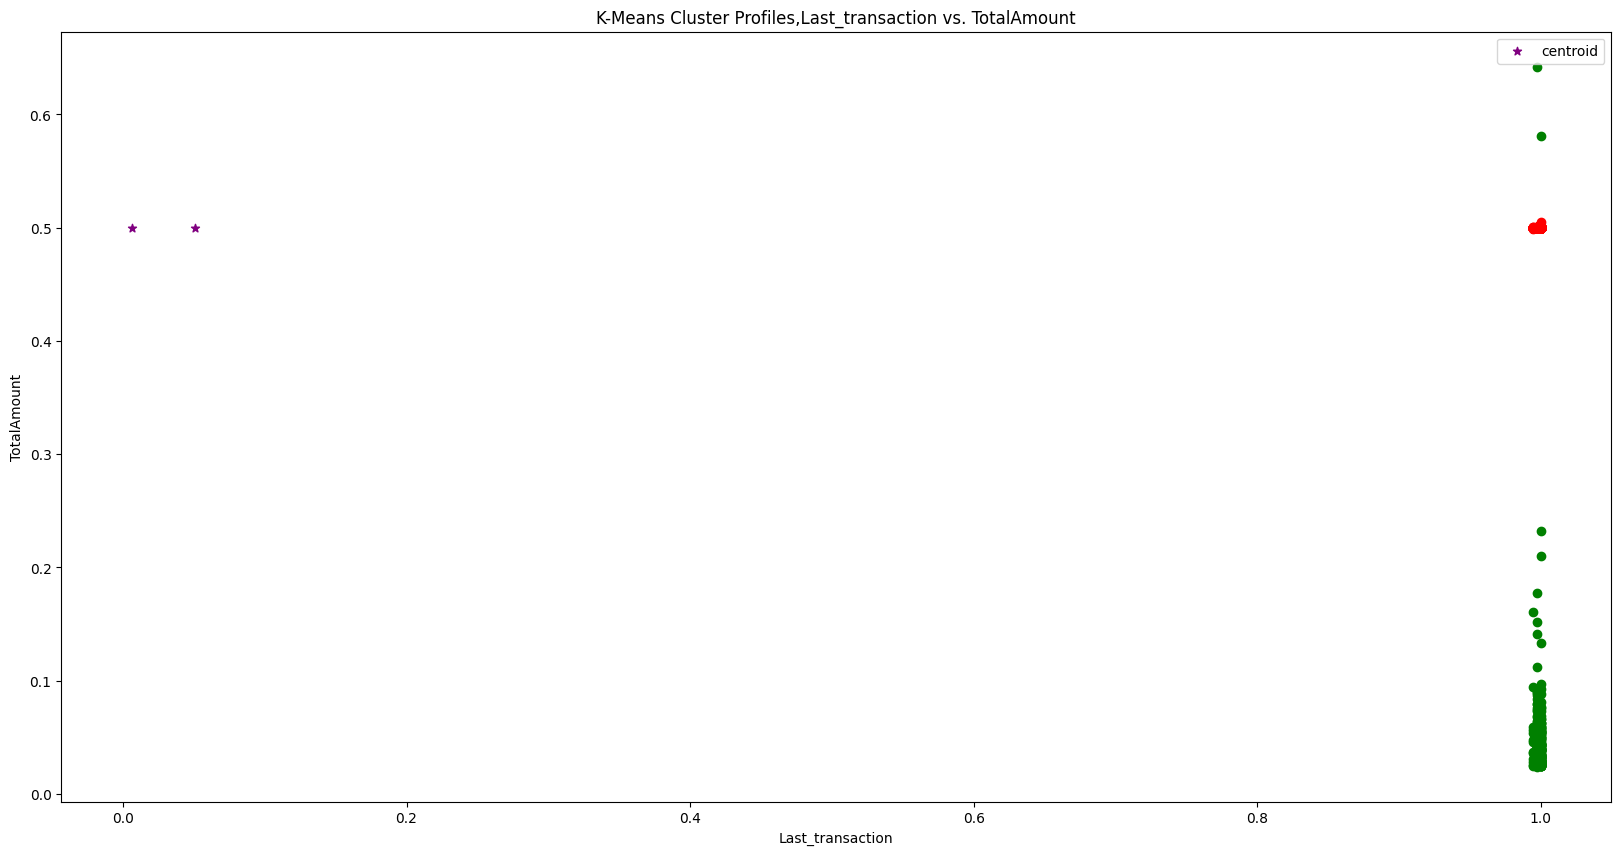

In [35]:
kmeans = KMeans(n_clusters=2, max_iter=50)
y_predicted = kmeans.fit_predict(data_set_scaled)
data_set_scaled['clusters']= y_predicted

data_set_scaled['clusters']= y_predicted
df1 = data_set_scaled[data_set_scaled.clusters==0]
df2 = data_set_scaled[data_set_scaled.clusters==1]
df3 = data_set_scaled[data_set_scaled.clusters==2]
plt.figure(figsize=(20,10))
plt.scatter(df1.Transaction,df1['Frequcency'],color='green')
plt.scatter(df2.Transaction,df2['Items_bought'],color='red')
plt.scatter(df3.Transaction,df3['Transaction'],color='blue')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmount')
plt.title('K-Means Cluster Profiles,Last_transaction vs. TotalAmount')
plt.show()

# Hirerchical clustering

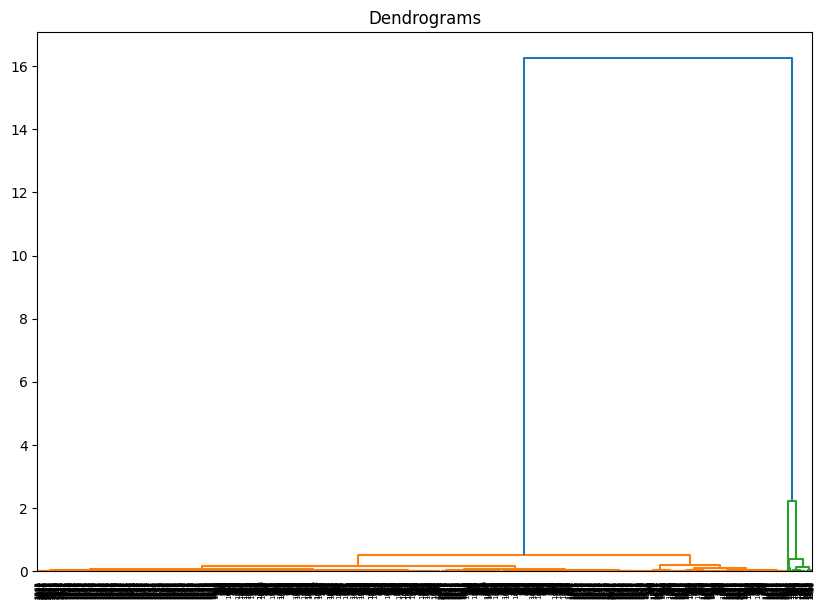

In [49]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_set_scaled, method='ward'))

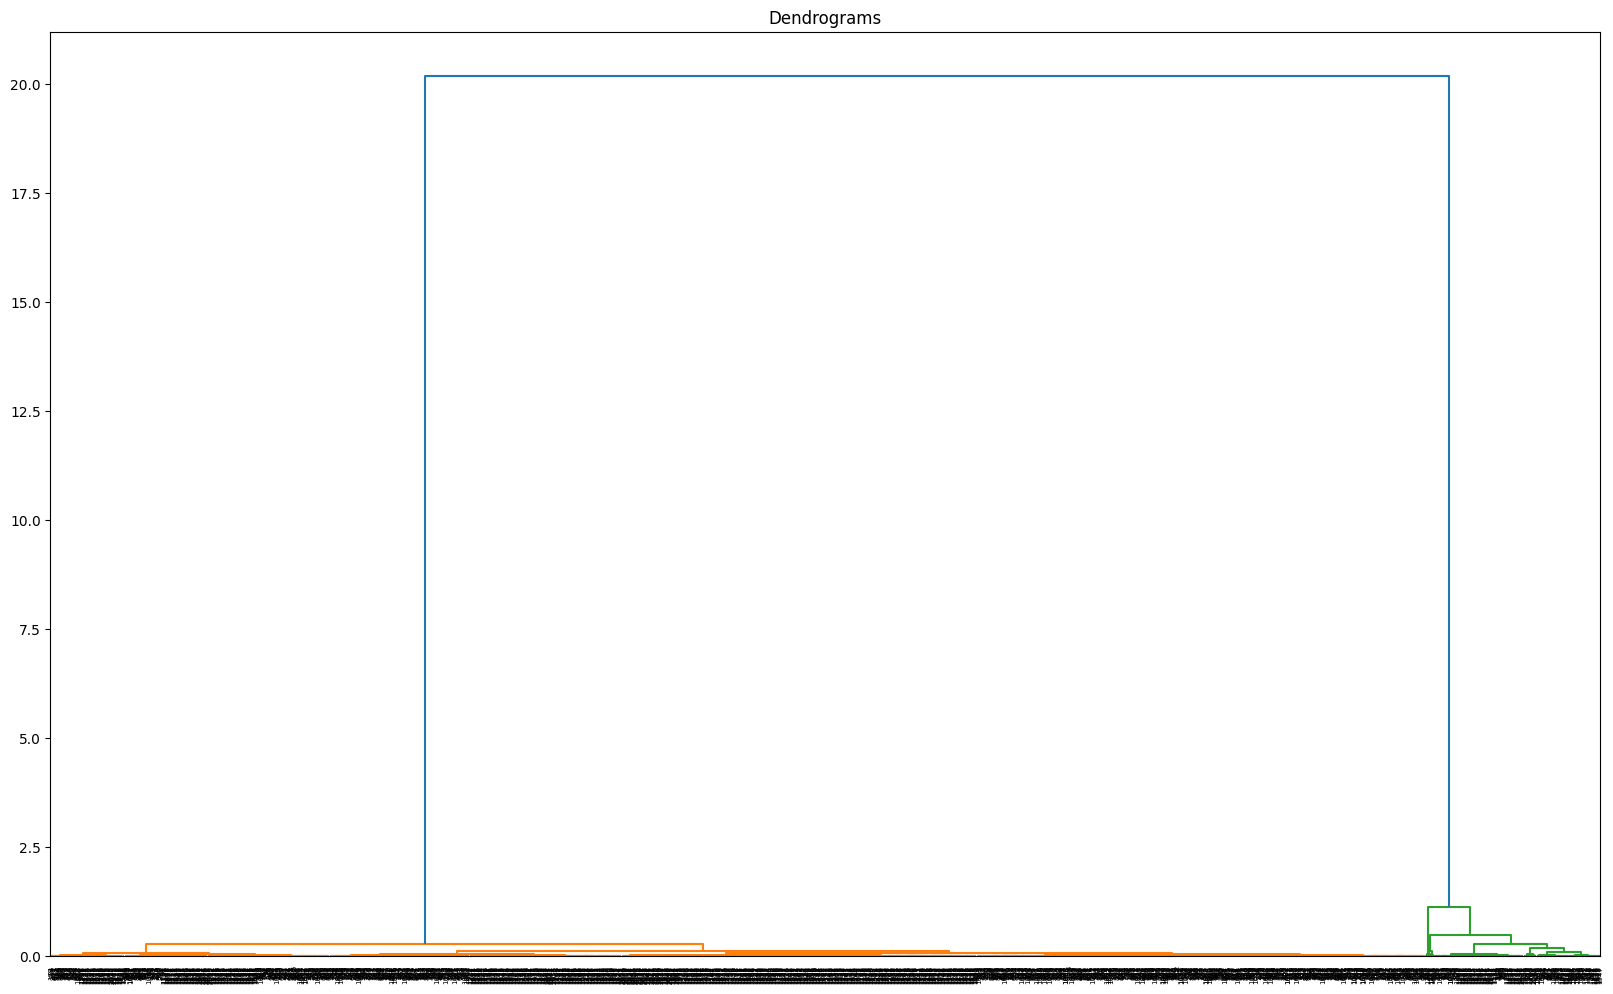

In [37]:
plt.figure(figsize=(20, 12))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_set_scaled, method='ward'))
plt.axhline(y=50, c='grey', lw=1, linestyle='dashed')
plt.show()

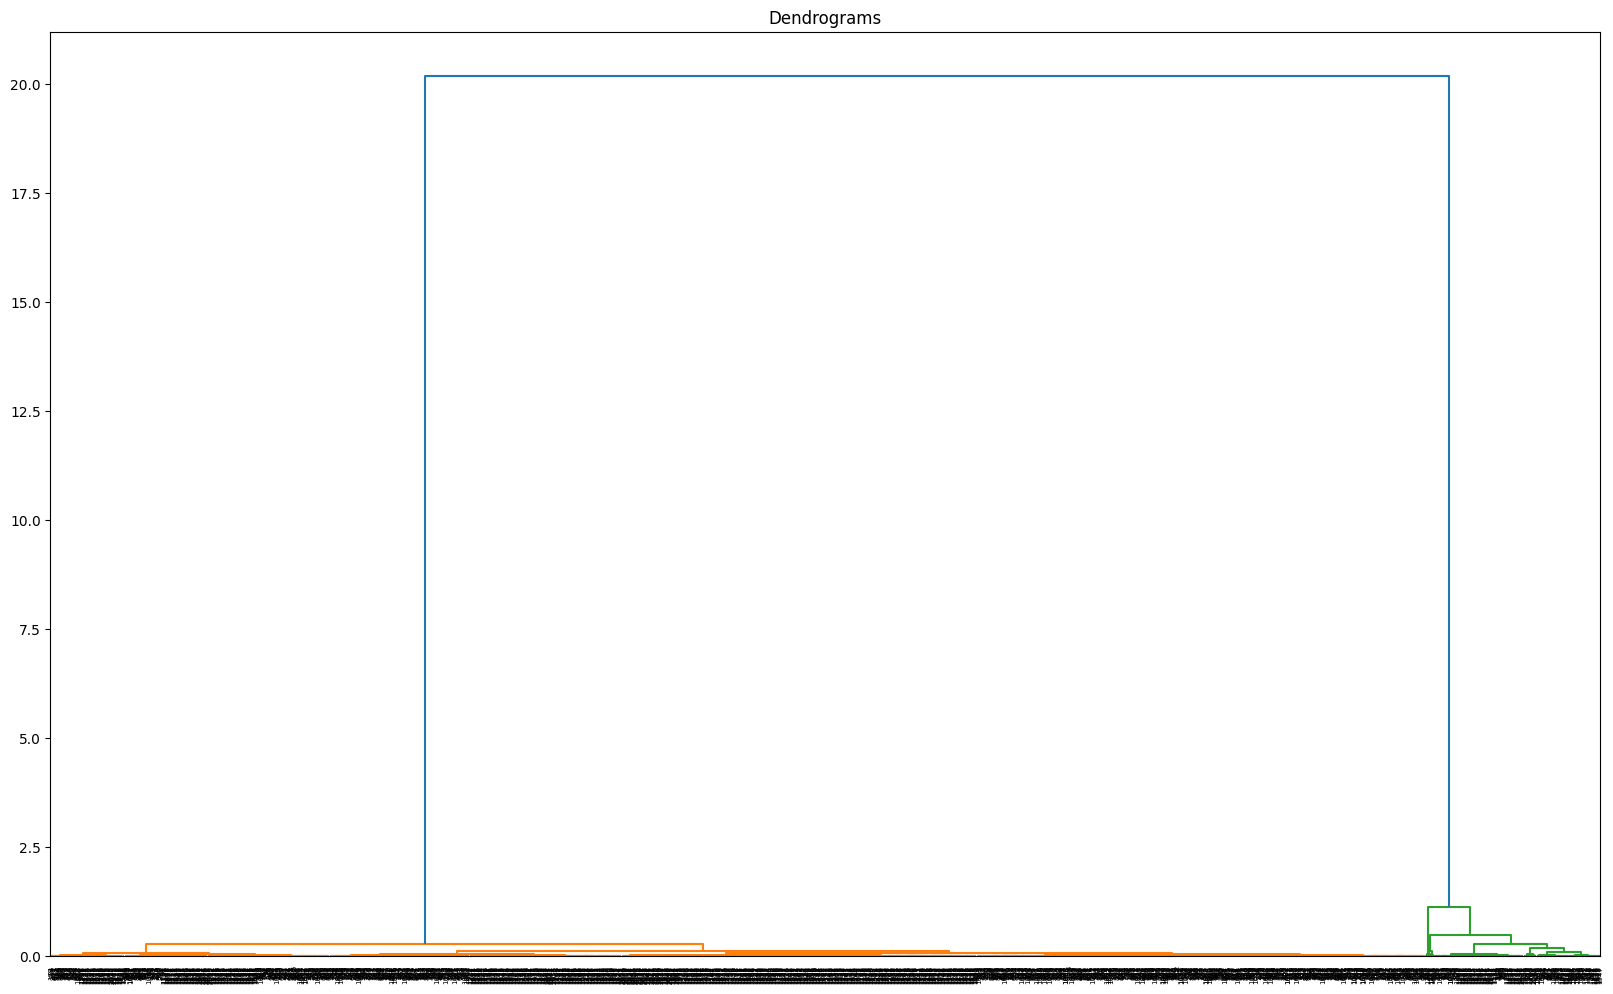

In [38]:
plt.figure(figsize=(20, 12))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_set_scaled, method='ward'))
plt.axhline(y=30, c='grey', lw=1, linestyle='dashed')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


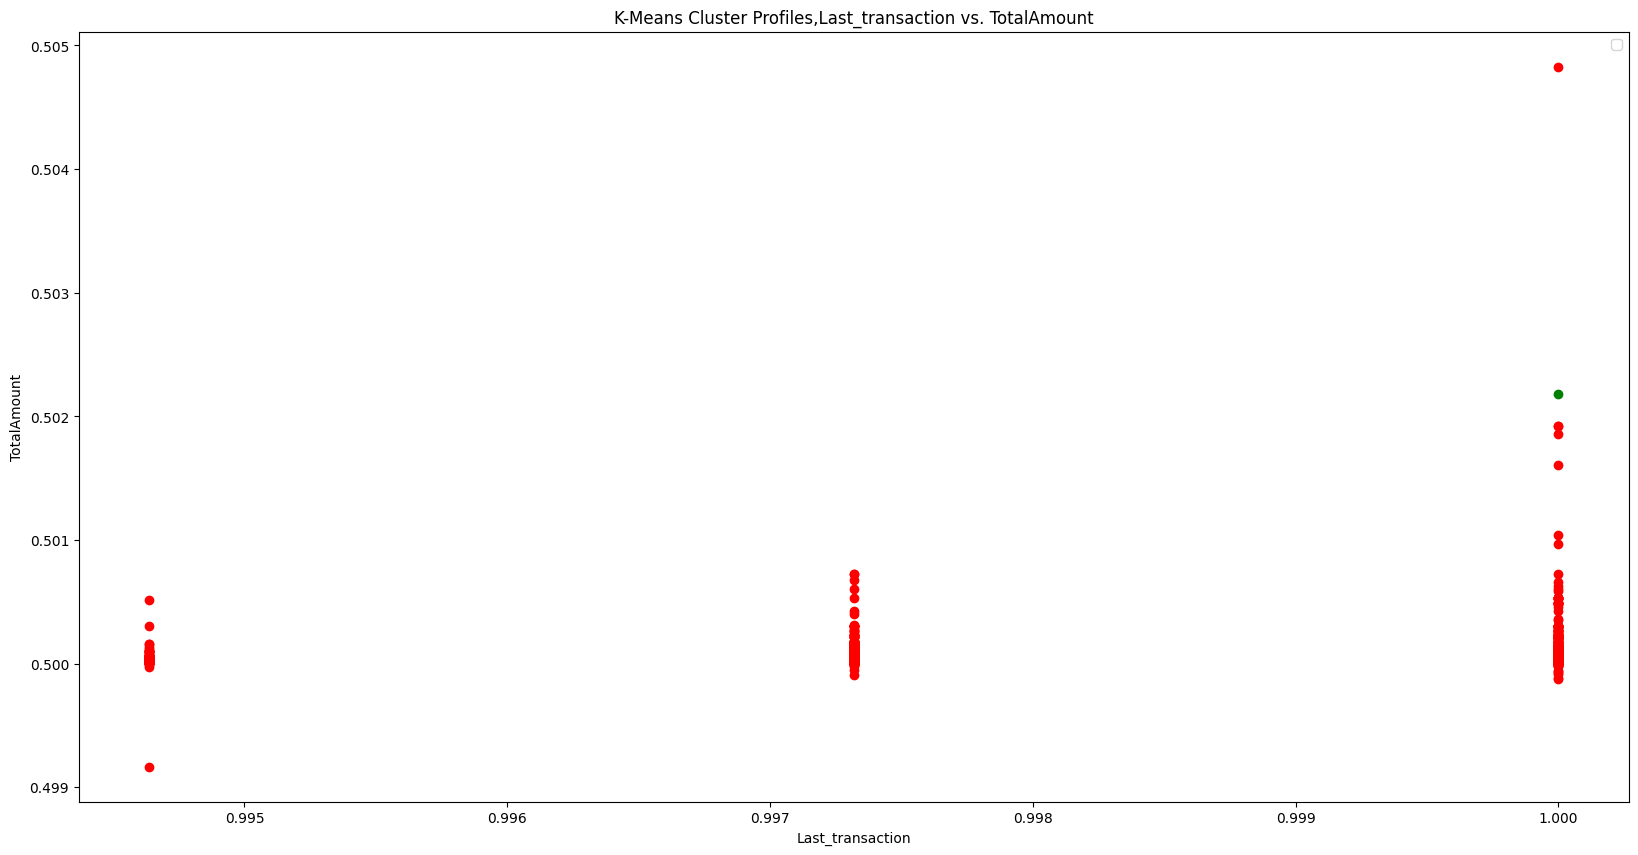

In [48]:
from sklearn.cluster import AgglomerativeClustering
cluster_new = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
two_clusters=cluster_new.fit_predict(data_set_scaled)

cluster_new = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
three_clusters=cluster_new.fit_predict(data_set_scaled)

data_set_scaled['two_clusters'] = two_clusters
data_set_scaled['three_clusters']= three_clusters


df1 = data_set_scaled[data_set_scaled.two_clusters==0]
df2 = data_set_scaled[data_set_scaled.two_clusters==1]
plt.figure(figsize=(20,10))
plt.scatter(df1.Transaction,df1['Items_bought'],color='green')
plt.scatter(df2.Transaction,df2['Items_bought'],color='red')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('TotalAmount')
plt.title('K-Means Cluster Profiles,Last_transaction vs. TotalAmount')
plt.show()

# Conclusion

We tried 2 different models
- K-Means
- Hierarchical Agglomerative Clustering

Some customers are crucial due to high spending and frequency of purchases.

We could potentially collect more customer data to customize product offerings for each segment.